In [ ]:
import os
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
# Paths
dataset_path = "/content/archive (3).zip"  # Replace with your dataset path
extracted_dataset_path = "/content/dataset"

# Extract the zip file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dataset_path)

# Hyperparameters
batch_size = 32
image_size = (224, 224)
num_epochs = 5
learning_rate = 0.0001

In [ ]:
train_dir = "/content/dataset/ASD_v4_datasets/train"
valid_dir = "/content/dataset/ASD_v4_datasets/valid"
test_dir = "/content/dataset/ASD_v4_datasets/test"

In [ ]:
# Data Augmentation and Normalization
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  # Split 20% for validation
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=20
)

In [ ]:
# Load VGG19 model without the top layers
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
output = Dense(1, activation='sigmoid')(x)  # Sigmoid for binary classification

# Final model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,447,425 (100.89 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [ ]:
# Save the best model during training
checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True, verbose=1)
# Changed file extension to .keras

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator,
    callbacks=[checkpoint, early_stopping]  # Include callbacks
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.6159 - loss: 0.7102 
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to best_model.keras
64/64 ━━━━━━━━━━━━━━━━━━━━ 1618s 25s/step - accuracy: 0.6168 - loss: 0.7087 - val_accuracy: 1.0000 - val_loss: 0.2584
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.7684 - loss: 0.4804 
Epoch 2: val_accuracy did not improve from 1.00000
64/64 ━━━━━━━━━━━━━━━━━━━━ 1640s 25s/step - accuracy: 0.7683 - loss: 0.4805 - val_accuracy: 1.0000 - val_loss: 0.2457
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.7707 - loss: 0.4591 
Epoch 3: val_accuracy did not improve from 1.00000
64/64 ━━━━━━━━━━━━━━━━━━━━ 1615s 25s/step - accuracy: 0.7706 - loss: 0.4593 - val_accuracy: 1.0000 - val_loss: 0.2021
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.7672 - loss: 0.4739 
Epoch 4: val_accuracy did not improve from 1.00000
64/64 ━━━━━━━━━━━━━━━━━━━━ 1635s 25s/step - accuracy: 0.7673 - loss: 0.4738 - val

In [ ]:
# Evaluate on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.9375 - loss: 0.1874
Validation Accuracy: 0.94


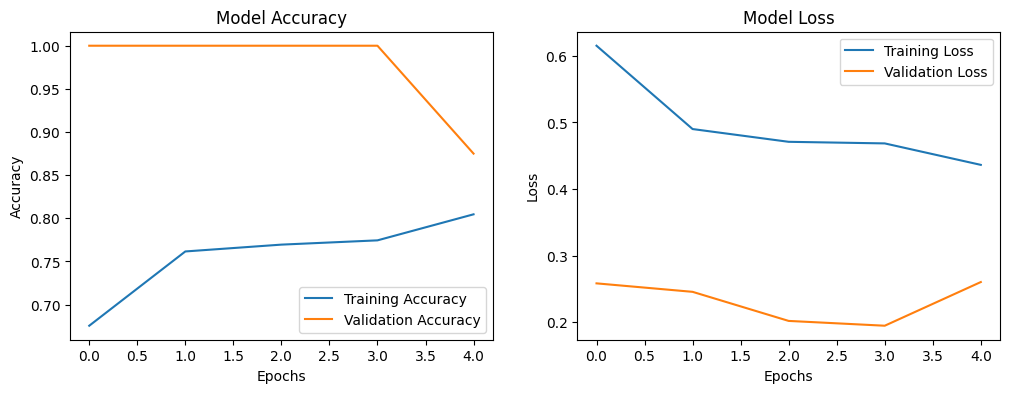

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
# Load the best saved model
from tensorflow.keras.models import load_model

model = load_model("best_model.keras")  # Replace with the path to your saved model file

# Test a single image
from tensorflow.keras.preprocessing import image

test_image_path = "/content/dataset/ASD_v4_datasets/train/non_autistic/na.0005.jpg"  # Replace with your test image path
img = image.load_img(test_image_path, target_size=image_size)
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
prediction = model.predict(img_array)
print("Prediction:", "Autism" if prediction[0][0] > 0.5 else "Non-Autism")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediction: Non-Autism
